In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import seaborn as sns
import ydata_profiling
import warnings
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
dx = pd.read_excel('X_bp.xlsx', index_col=0)
dx.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [5]:
dx.shape

(1023, 10)

In [6]:
ds = pd.read_excel('X_nup.xlsx', index_col=0)
ds.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [7]:
ds.shape

(1040, 3)

In [8]:
#По условия задания необходимо объединить две таблицы в одну используя метод Inner
df = dx.join(ds, how='inner') # Объединяем 2 таблицы в одну. 
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [9]:
df.shape # смотрим размерность полуенного датасета

(1023, 13)

In [10]:
df.isnull().sum() # смотрим  пропуски в объеденненом датасете

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

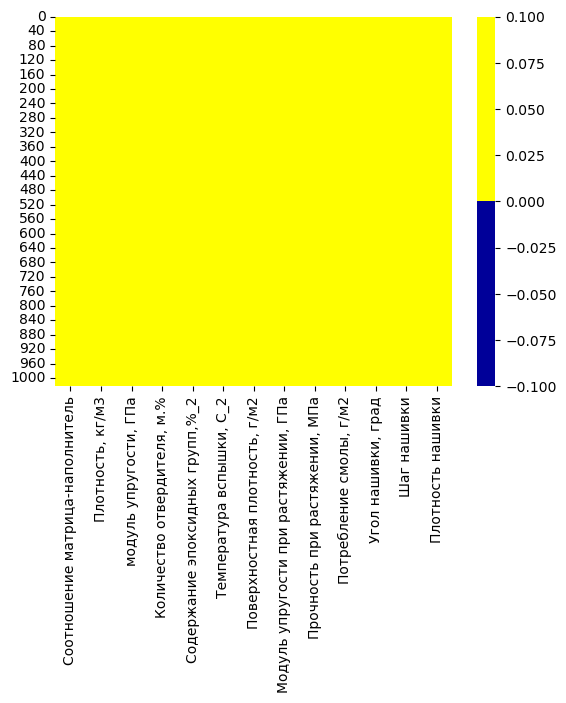

In [11]:
# Удостоверимся в отсутствии пропусков на тепловой карте
cols = df.columns[:13] 
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Вывод: По полученным результатам видно, что пропуски в датасете отсутствуют

In [12]:
df.info() # выводим информацию пи типам данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Вывод: В датасете представлены 2 типа данных: float64 и int64 

In [13]:
# Смотрим описательную статистику. Выведем ее в удобном для просмотра ввиде
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [14]:
df.median() # найдем медиану для столбцов датасета

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

In [15]:
df.mean() # найдем среднее значение для стобцов датасета

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [16]:
df.nunique() # выведем количество уникальных значений столцов

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Вывод: Из результатво видно, что у столбца - "Угол нашивки, град" всего 2 значения. 

In [17]:
df.duplicated() # смотрим дубликаты данных в датасете

0       False
1       False
2       False
3       False
4       False
        ...  
1018    False
1019    False
1020    False
1021    False
1022    False
Length: 1023, dtype: bool

Вывод: дубликатов в датасете нет

array([[<AxesSubplot:title={'center':'Соотношение матрица-наполнитель'}>,
        <AxesSubplot:title={'center':'Плотность, кг/м3'}>,
        <AxesSubplot:title={'center':'модуль упругости, ГПа'}>,
        <AxesSubplot:title={'center':'Количество отвердителя, м.%'}>],
       [<AxesSubplot:title={'center':'Содержание эпоксидных групп,%_2'}>,
        <AxesSubplot:title={'center':'Температура вспышки, С_2'}>,
        <AxesSubplot:title={'center':'Поверхностная плотность, г/м2'}>,
        <AxesSubplot:title={'center':'Модуль упругости при растяжении, ГПа'}>],
       [<AxesSubplot:title={'center':'Прочность при растяжении, МПа'}>,
        <AxesSubplot:title={'center':'Потребление смолы, г/м2'}>,
        <AxesSubplot:title={'center':'Угол нашивки, град'}>,
        <AxesSubplot:title={'center':'Шаг нашивки'}>],
       [<AxesSubplot:title={'center':'Плотность нашивки'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

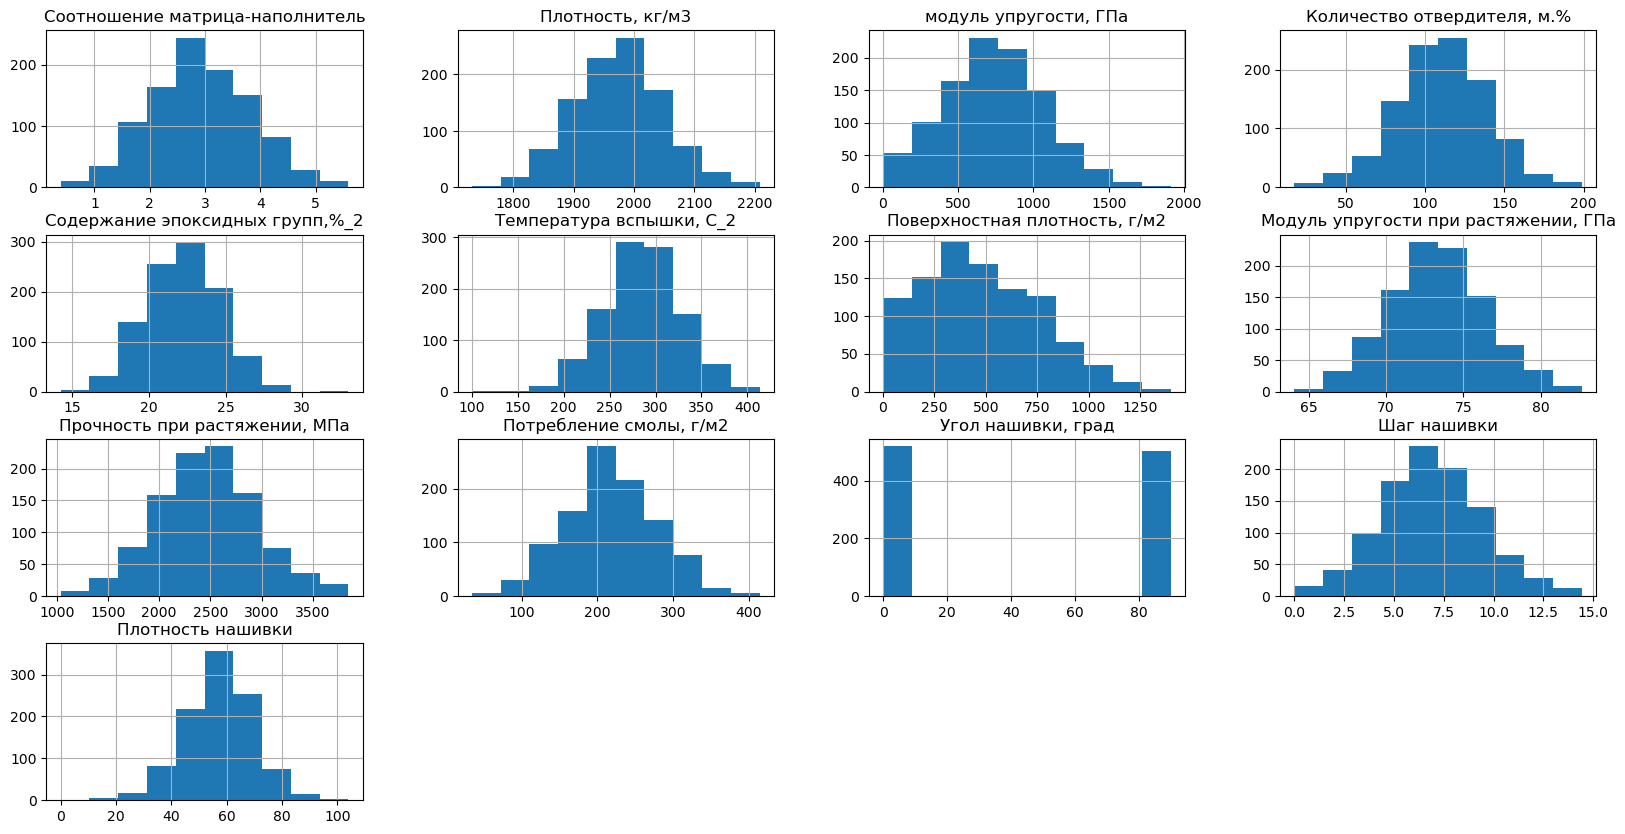

In [18]:
df.hist(figsize=(20,10)) # рисуем гистограммы распеределения переменной

Вывод: Из гистограмм распределения переменной видим, что все переменные кроме "Угол нашивки" имеют нормальное распределение. 

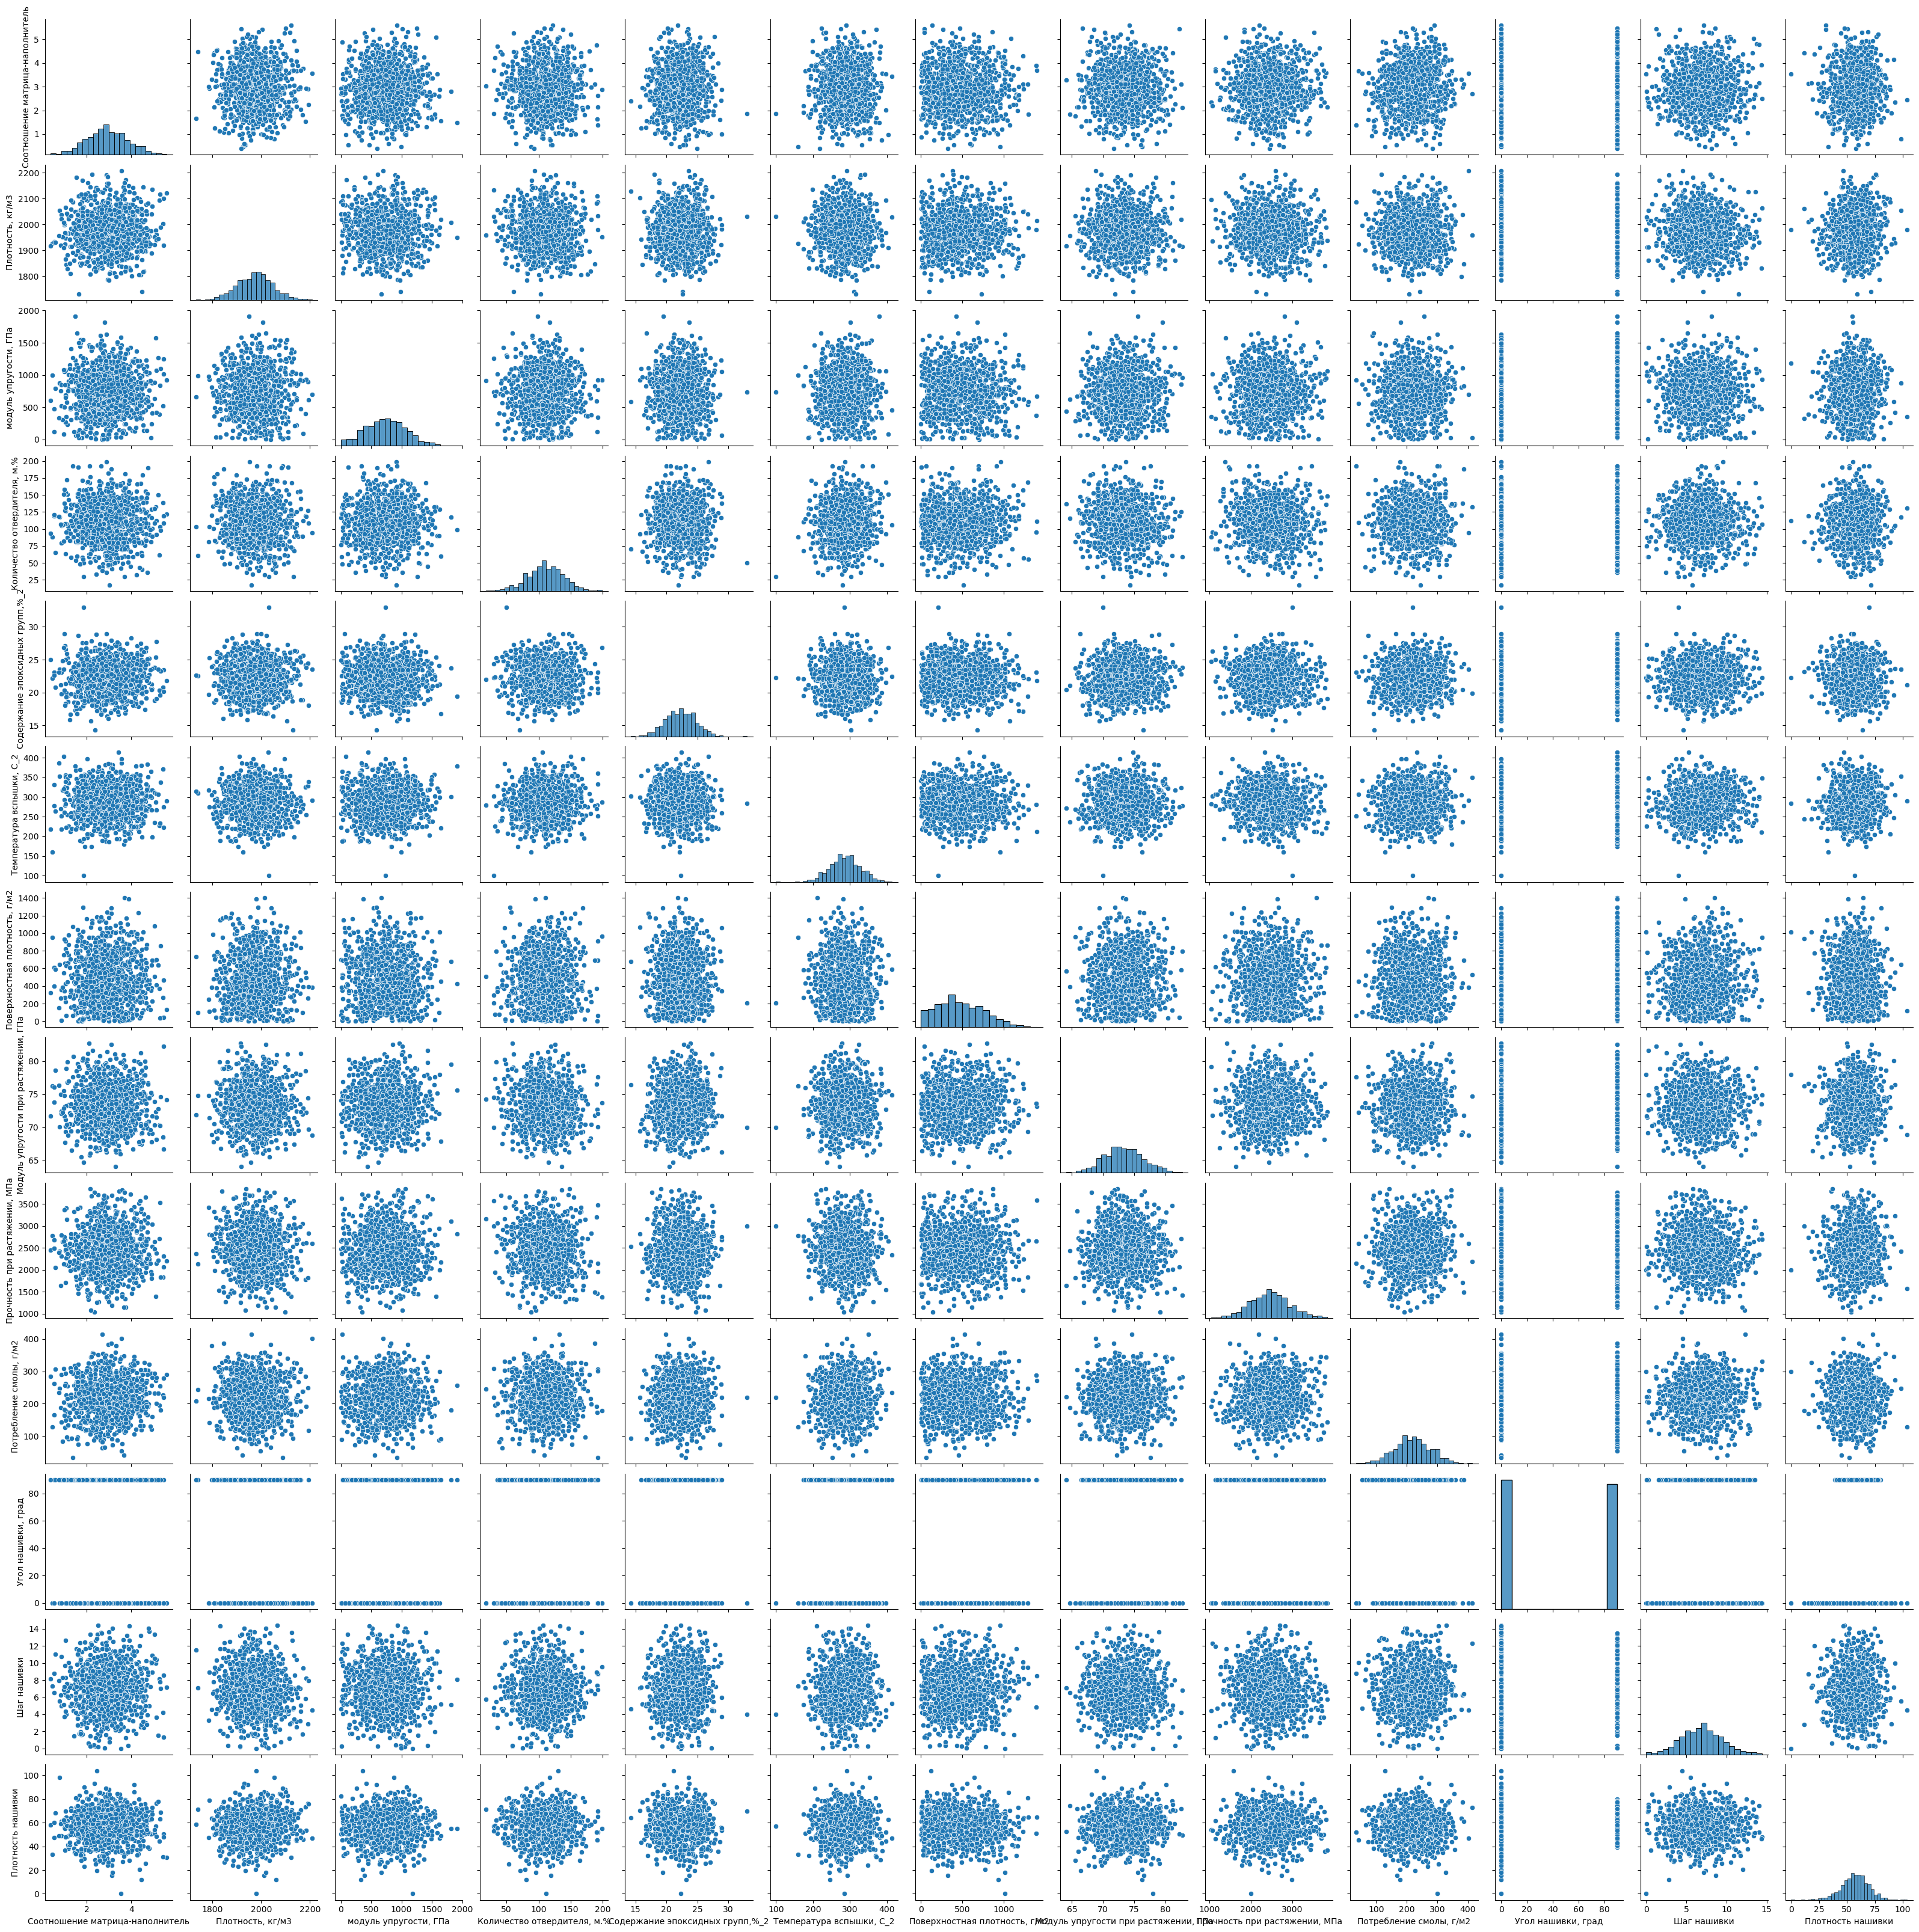

In [18]:
sns.pairplot(df) # рисуем попарные графики рассеяния точек

Из графиков попарного рассеивания видно, что в датасете присутствуют выбросы.
Попробуем построить диаграммы ящика с усами.

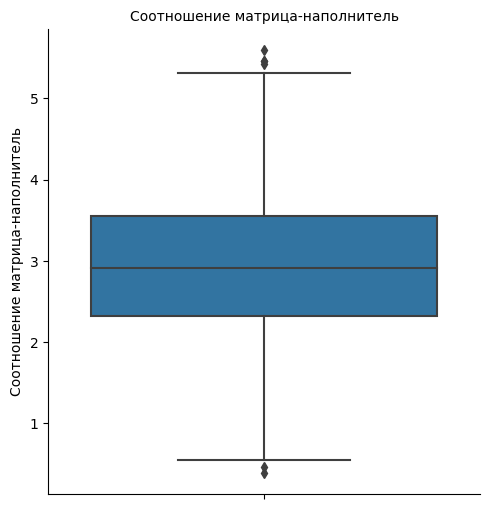

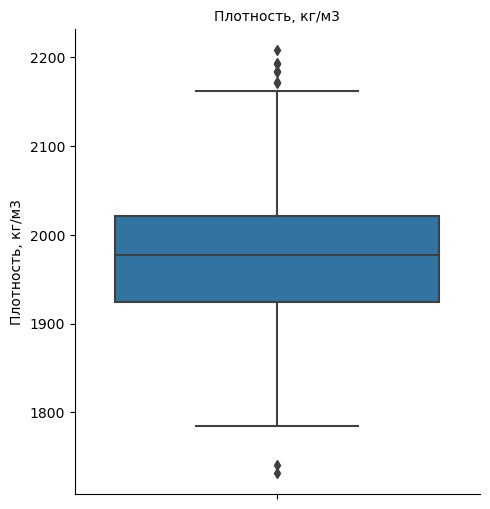

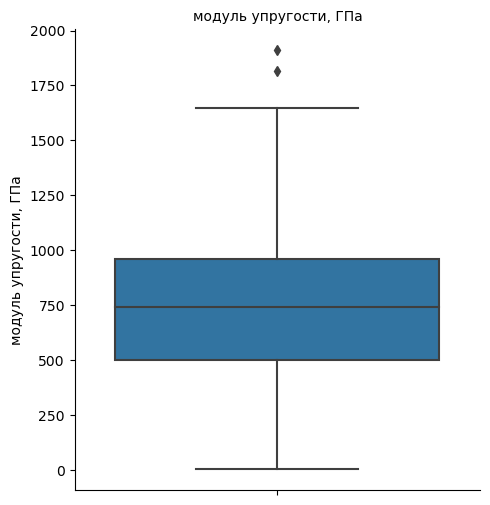

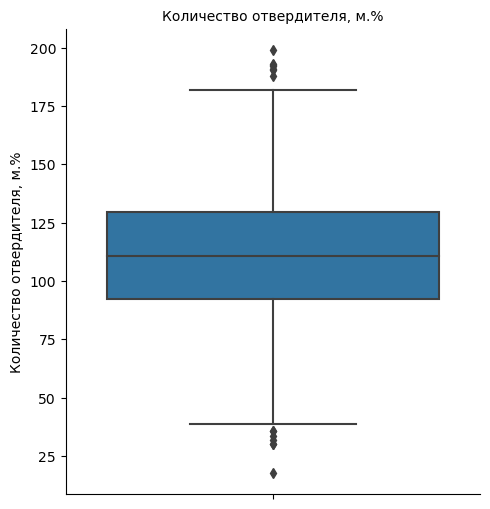

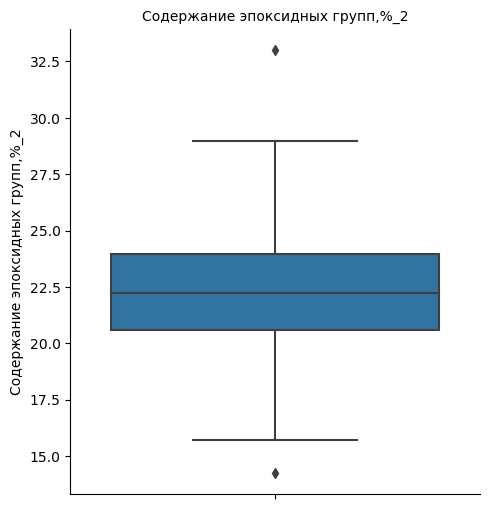

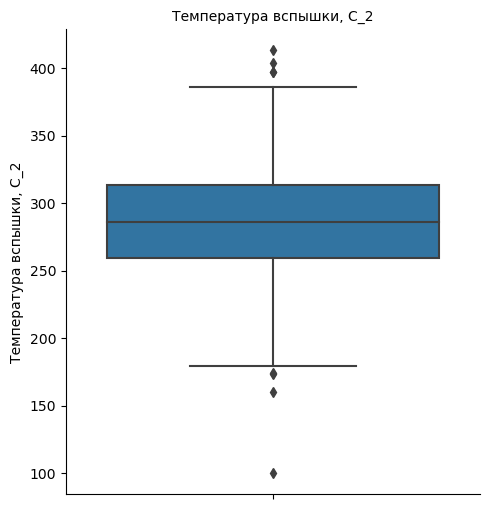

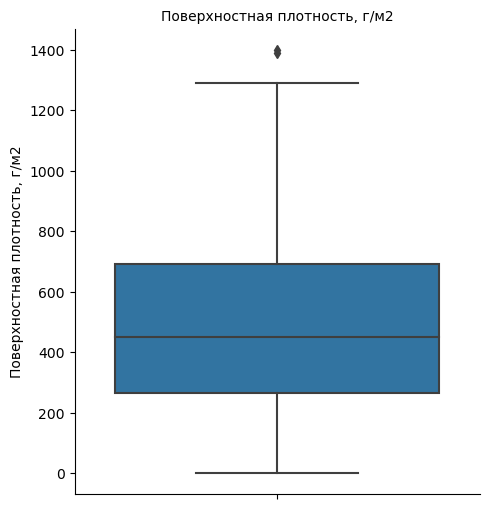

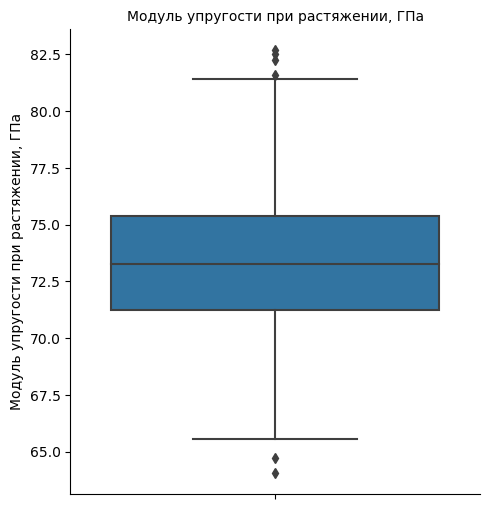

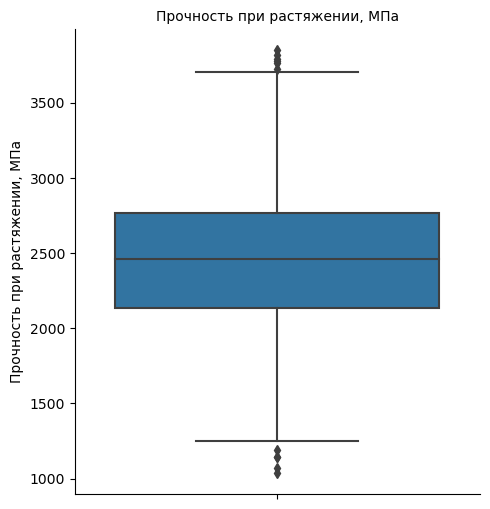

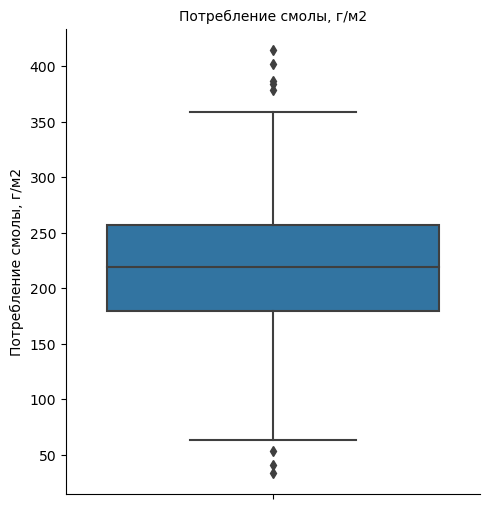

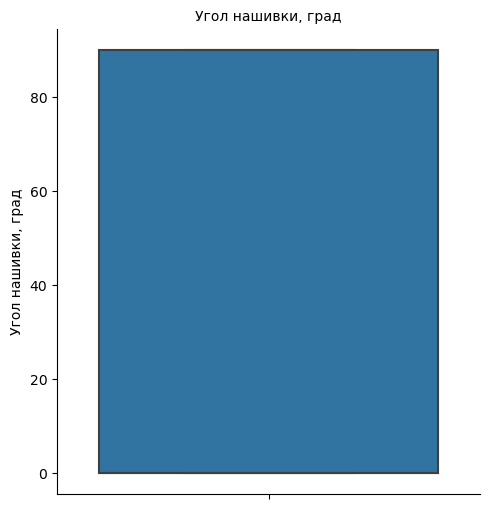

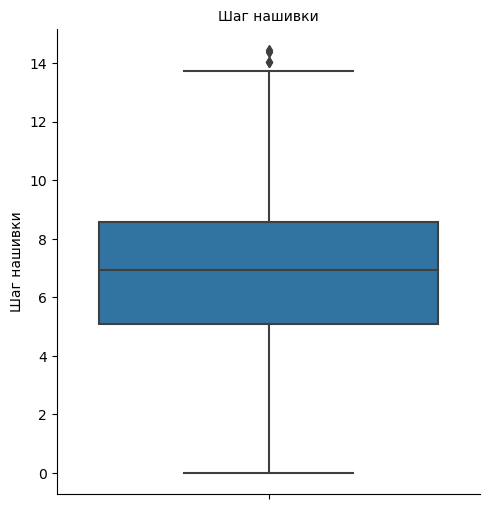

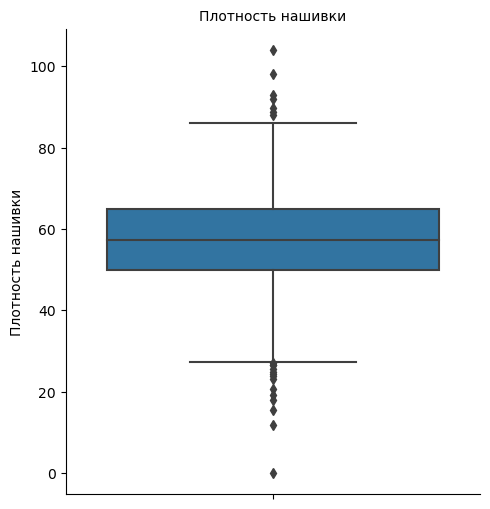

In [19]:
# Потстроим диаграммы ящика с усами

for col in df.columns:
    sns.catplot(y=col, data=df, kind='box')
    plt.title(col, fontsize=10)

Выод: из графиков видно, что выбросы имеются во всех столбцах, кроме "Угол нашивки, град". Особенно много в столбце "Плотность нашивки"

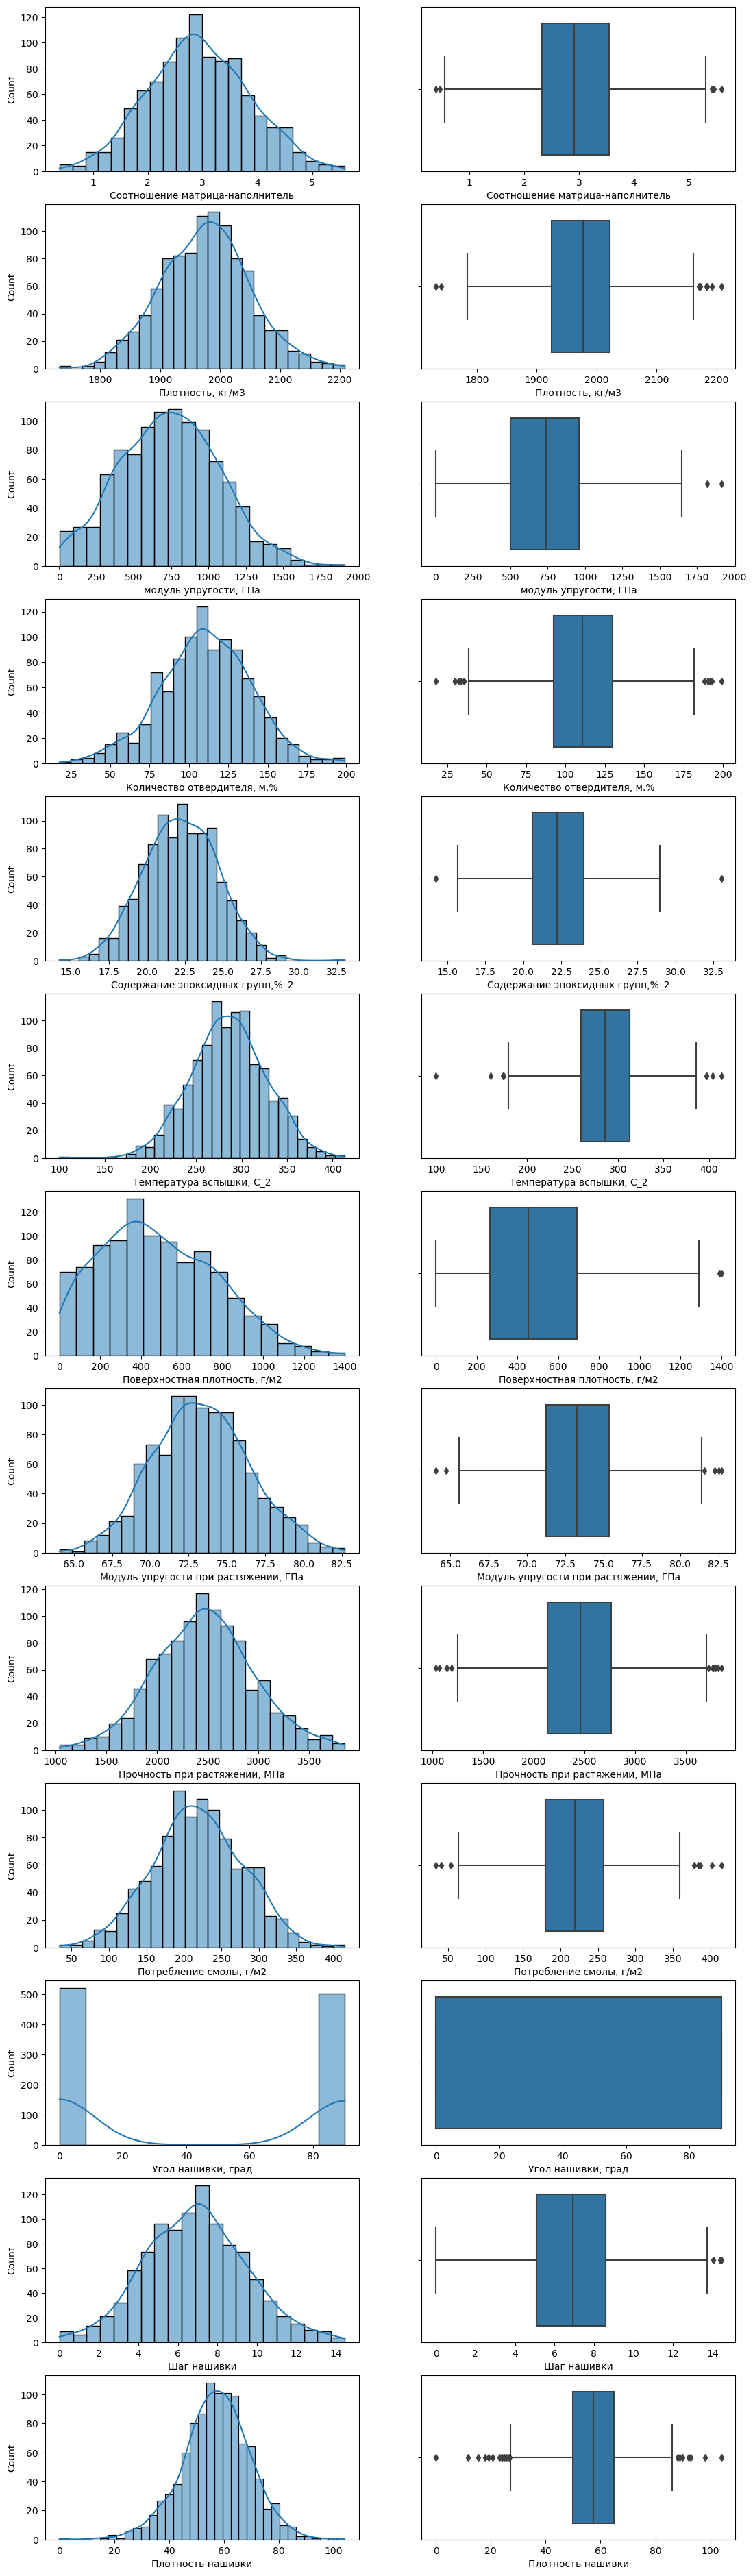

In [20]:
# Для лучшего понимания, выведем графики распределения переменных и "ящики с усами" вместе
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for i, col in enumerate(df.columns):    
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df, x=col, ax=axes[i, 1])
plt.show()

Вывод: из графиков попарных рассеиваний точек и графиков "ящиков с усами" видно, что в датасете присутствуют выбросы. Необходимо исследовать данные выбросы

##### Анализ выбросов

Для поиска выбросов будем использовать IsolationForest (изолирующий лес) и метод 3 сигм.

In [19]:
# Сохранием объединенный датасет в новый файл с расширением xlsx
df.to_excel('./X_union.xlsx')

In [20]:
df_copy = df.copy(deep=True) # сделаем копию нашего датасета

Для поиска выбросов сначала будем использовать IsolationForest

In [21]:
# Найдем выбросы с помощью Изолирующего леса
iso = IsolationForest()
iso_outliers = iso.fit_predict(df_copy)

# # Удалим выбросы
for i in range(len(iso_outliers)):
    if iso_outliers[i] == -1:
         df_copy.drop(i, inplace = True)
# # Выведем полуенный результат
df_copy.shape

(939, 13)

Для поиска выбросов еще попробуем метод 3 сигм.

In [22]:
 # методом 3-х сигм
sigma_3 = 0
for col in df_copy:
    d = df_copy.loc[:, [col]]        
    zscore = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    d['3s'] = zscore.abs() > 3
    sigma_3 += d['3s'].sum()
       
print('Метод 3-х сигм, выбросов:', sigma_3)


Метод 3-х сигм, выбросов: 21


Для удаления выбросов будем пользоватся методом 3 сигм

In [23]:
# удаление выбросов
z = np.abs(stats.zscore(df_copy))
df_clean = df_copy[(z<3).all(axis=1)]
df_clean.shape

(918, 13)

In [24]:
df_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [25]:
df_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

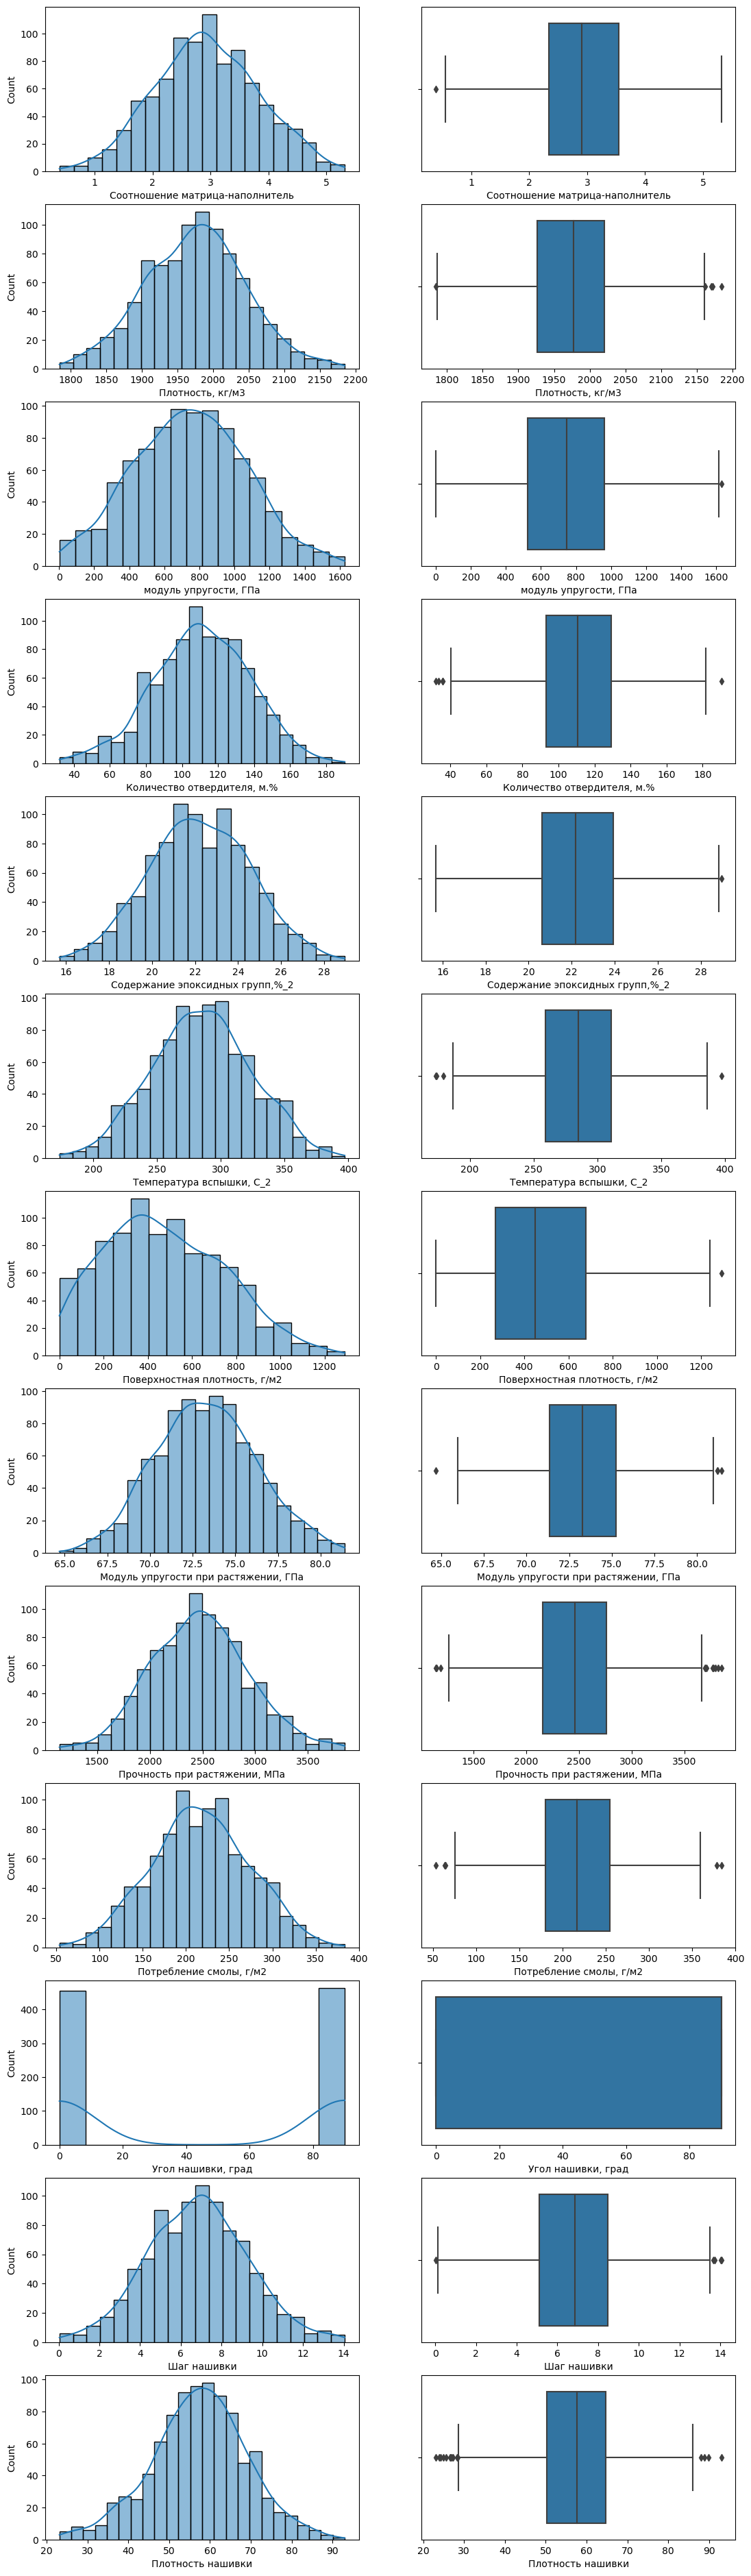

In [26]:
# Выведем графики распределения переменных и "ящики с усами" вместе
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for i, col in enumerate(df_clean.columns):    
    sns.histplot(data=df_clean, x=col, kde=True, ax=axes[i, 0])
    sns.boxplot(data=df_clean, x=col, ax=axes[i, 1])
plt.show()


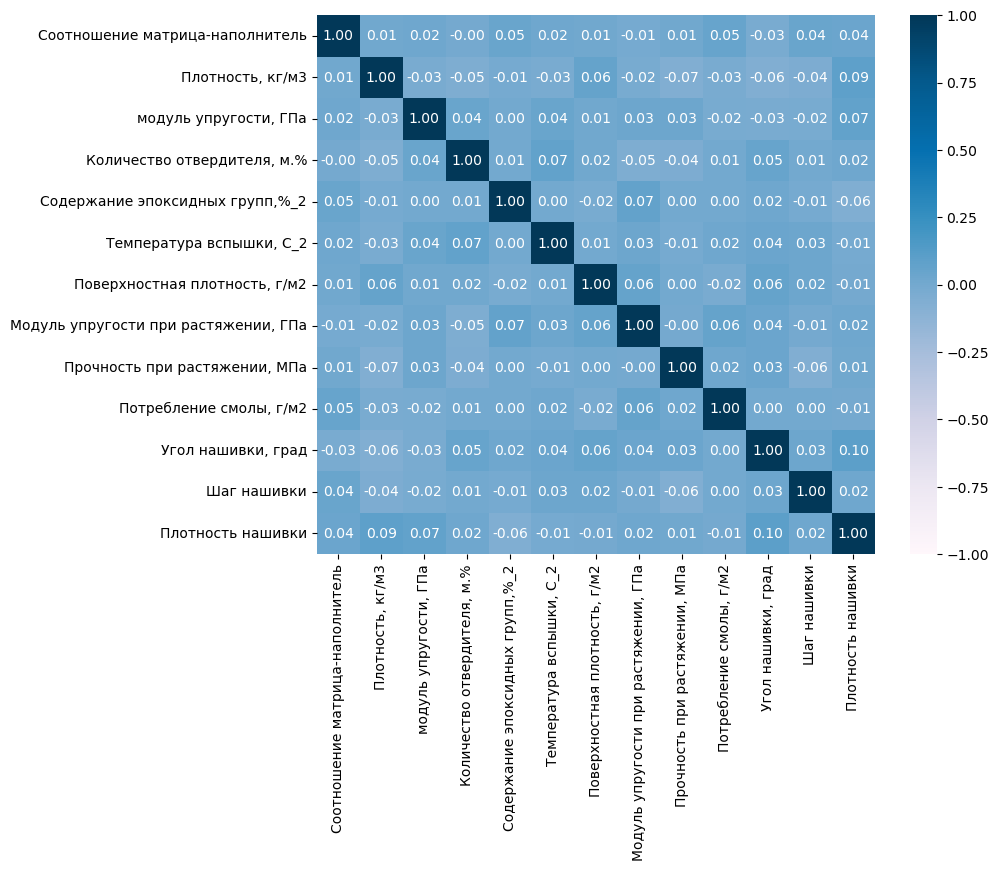

In [27]:
# Рассмотрим матрицу корреляции. Для этого построим тепловую карту
corr = df_clean.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuBu', ax=ax)
plt.show()

Выводы: Из тепловой карты видно, что параметры имеют очень слабую корреляцию. Т.е. переменные между собой не взимосвзязаны или имеют очень слабую зависимость.

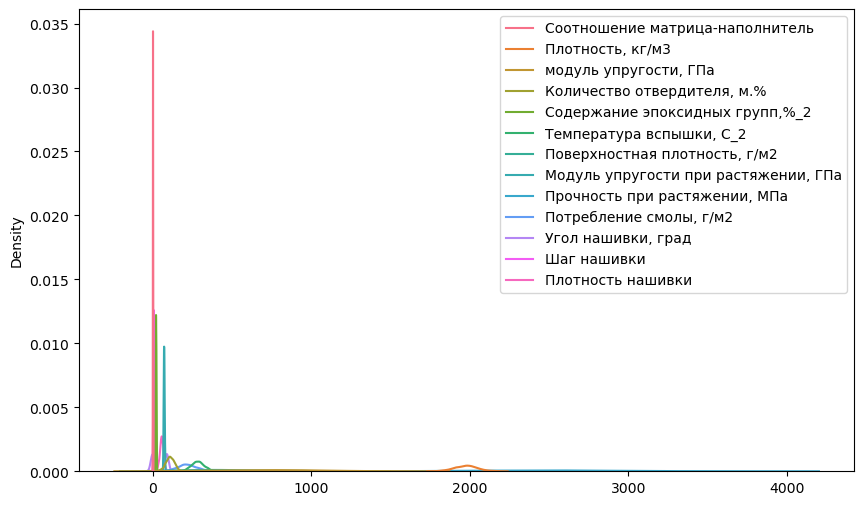

In [28]:
# Построим график оценки плотности расппределения данных
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_clean)
plt.show()

Вывод: изграфика видно, что данные имеют разный диапазон, поэтому целесообразно для дальнейшей работы провести нормализацию.

In [29]:
# Очищенные данные тоже сохраним
df_clean.to_excel('./X_clean.xlsx')

### Обучение моделей

Обучить нескольких моделей для прогноза:
1. модуля упругости при растяжении 
2. прочности при растяжении. 

При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 

При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.

In [30]:
# Загрузим наши сохраненные данные
df = pd.read_excel('X_clean.xlsx', index_col=0)
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [31]:
# Выведем размерность
df.shape

(918, 13)

In [32]:
# Для удобства работы выведем названия столбцов
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [33]:
# Т.к. Столбец Угол нашивки, град принимает только 2 значения 0 и 90, то закодтруем его с помощию LaLabelEncoder
le = LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [34]:
# Сделаем нормализацию используя MinMaxScaler.
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index = df.index)
df_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         0.298034          0.613778               0.452951   
3                         0.298034          0.613778               0.452951   
4                         0.483666          0.613778               0.461725   
5                         0.482973          0.538780               0.458649   
6                         0.442707          0.313786               0.494944   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                     0.113588                         0.607435   
3                     0.612643                         0.418887   
4                     0.504367                         0.495653   
5                     0.504367                         0.495653   
6                     0.504367                         0.495653   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                  0.496858                        0.16223   
3                  0.565642                        0.16223   
4                  0.496858                        0.16223   
5                  0.496858                        0.16223   
6                  0.496858                        0.16223   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                              0.317187                       0.686371   
3                              0.317187                       0.686371   
4                              0.317187                       0.686371   
5                              0.317187                       0.686371   
6                              0.317187                       0.686371   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 0.504222                 0.0     0.282748           0.527880  
3                 0.504222                 0.0     0.354107           0.341687  
4                 0.504222                 0.0     0.354107           0.484912  
5                 0.504222                 0.0     0.354107           0.527880  
6                 0.504222                 0.0     0.354107           0.671105

In [35]:
# Посмотрим описталеьную статистику
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       918.0  0.516037  0.180297  0.0   
Плотность, кг/м3                      918.0  0.477197  0.174914  0.0   
модуль упругости, ГПа                 918.0  0.457367  0.195124  0.0   
Количество отвердителя, м.%           918.0  0.497438  0.167943  0.0   
Содержание эпоксидных групп,%_2       918.0  0.491446  0.175377  0.0   
Температура вспышки, С_2              918.0  0.499255  0.173460  0.0   
Поверхностная плотность, г/м2         918.0  0.368558  0.208445  0.0   
Модуль упругости при растяжении, ГПа  918.0  0.515052  0.176291  0.0   
Прочность при растяжении, МПа         918.0  0.492664  0.169874  0.0   
Потребление смолы, г/м2               918.0  0.495355  0.171169  0.0   
Угол нашивки, град                    918.0  0.504357  0.500254  0.0   
Шаг нашивки                           918.0  0.485707  0.175711  0.0   
Плотность нашивки                     918.0  0.490755  0.166339  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.395153  0.512106  0.641659  1.0  
Плотность, кг/м3                      0.354814  0.482885  0.589427  1.0  
модуль упругости, ГПа                 0.320237  0.457026  0.590280  1.0  
Количество отвердителя, м.%           0.385527  0.497128  0.614270  1.0  
Содержание эпоксидных групп,%_2       0.371716  0.489054  0.620291  1.0  
Температура вспышки, С_2              0.382528  0.499864  0.613571  1.0  
Поверхностная плотность, г/м2         0.208126  0.348844  0.524259  1.0  
Модуль упругости при растяжении, ГПа  0.397103  0.512594  0.631618  1.0  
Прочность при растяжении, МПа         0.374406  0.487791  0.598018  1.0  
Потребление смолы, г/м2               0.383378  0.494405  0.610324  1.0  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.0  
Шаг нашивки                           0.362207  0.488123  0.602139  1.0  
Плотность нашивки                     0.388428  0.493810  0.595969  1.0

Вывод: Из таблицы видно, что стандартизация прошла успешно

На всякий случай, посмотрим еще корреляцию

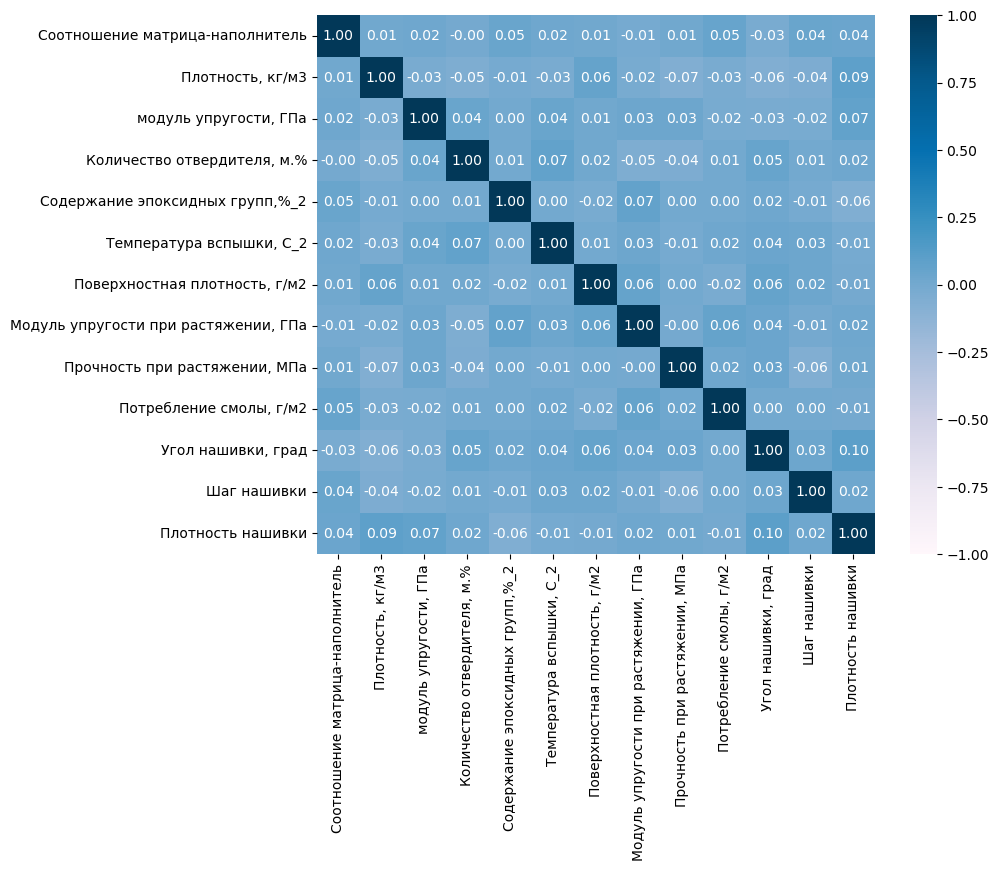

In [36]:
corr = df_norm.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='PuBu', ax=ax)
plt.show()

Вывод: корреляция между признаками так и осталась очень слабой

### Обучение нескольких моделей для прогноза модуля упругости при растяжении 

In [37]:
# Добавим необходимы импорты
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, BayesianRidge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler


In [38]:
# сделаем копию датасета для первой задачи (прогноз модуля упругости при растяжении)
model_upr = df_norm.copy()

In [39]:
# Разделим датасет для - Модуля упругости при растяжении.
X_upr = model_upr.drop('Модуль упругости при растяжении, ГПа', axis=1)
y_upr = model_upr['Модуль упругости при растяжении, ГПа']

In [40]:
# Разделим датасет на тренировочную и тестовую выборки.
X_upr_train, X_upr_test, y_upr_train, y_upr_test = train_test_split(X_upr, y_upr, test_size=0.3, random_state=42)

In [41]:
# Посмотрим как разделидся датасет
print(X_upr_test.shape)
print(X_upr_train.shape)
print(y_upr_test.shape)
print(y_upr_train.shape)

(276, 12)
(642, 12)
(276,)
(642,)


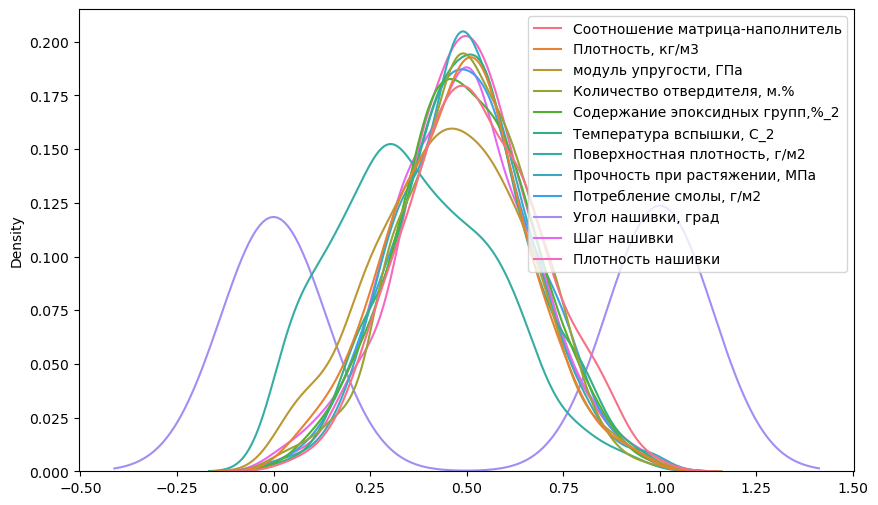

In [42]:
# Построим график оценки плотности расппределения данных после нормализации
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(data=X_upr_train)
plt.show()

Вывод: Из графика видно, что после нормализации данные находятся в одно  диапазоне

In [43]:
# Выведем описательную статистику у train
X_upr_train.describe().T

count      mean       std       min  \
Соотношение матрица-наполнитель  642.0  0.519371  0.177834  0.032081   
Плотность, кг/м3                 642.0  0.476244  0.175305  0.003883   
модуль упругости, ГПа            642.0  0.454985  0.194060  0.000000   
Количество отвердителя, м.%      642.0  0.500321  0.168789  0.000000   
Содержание эпоксидных групп,%_2  642.0  0.495052  0.173934  0.000000   
Температура вспышки, С_2         642.0  0.495050  0.173191  0.002186   
Поверхностная плотность, г/м2    642.0  0.366161  0.202631  0.000000   
Прочность при растяжении, МПа    642.0  0.493589  0.169186  0.000000   
Потребление смолы, г/м2          642.0  0.494753  0.173597  0.000000   
Угол нашивки, град               642.0  0.510903  0.500271  0.000000   
Шаг нашивки                      642.0  0.485240  0.180831  0.000000   
Плотность нашивки                642.0  0.498641  0.166571  0.010811   

                                      25%       50%       75%       max  
Соотношение матрица-наполнитель  0.398338  0.513788  0.642971  1.000000  
Плотность, кг/м3                 0.355048  0.484540  0.588302  0.969385  
модуль упругости, ГПа            0.321609  0.457734  0.587461  1.000000  
Количество отвердителя, м.%      0.386040  0.498219  0.614985  1.000000  
Содержание эпоксидных групп,%_2  0.379433  0.489801  0.617414  1.000000  
Температура вспышки, С_2         0.381307  0.496858  0.597867  1.000000  
Поверхностная плотность, г/м2    0.211993  0.348832  0.516412  0.952837  
Прочность при растяжении, МПа    0.376661  0.487791  0.599321  1.000000  
Потребление смолы, г/м2          0.380945  0.498923  0.608762  1.000000  
Угол нашивки, град               0.000000  1.000000  1.000000  1.000000  
Шаг нашивки                      0.357730  0.489188  0.605840  1.000000  
Плотность нашивки                0.389067  0.497814  0.606694  1.000000

In [17]:
# Напишем функцию для расчёта метрик.
def func_metrics(models, x, y):
    stat = pd.DataFrame() 
    cv = KFold(10, shuffle=True, random_state=42) 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error']  
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        # сохраняем среднии значения метрик.
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MSLE'] = scores['test_neg_mean_squared_log_error'].mean()
    return stat

In [25]:
# Сравнение моделей с параметрами по умолчанию
models_d = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
}
stat_d = func_metrics(models_d, X_upr_train, y_upr_train)
stat_d

R2      RMSE       MAE      MSLE
Lasso                     -0.012965 -0.176474 -0.141843 -0.014018
LinearRegression          -0.022297 -0.177333 -0.143260 -0.014162
BayesianRidge             -0.017154 -0.176859 -0.142225 -0.014077
DecisionTreeRegressor     -1.230128 -0.259753 -0.209310 -0.030228
GradientBoostingRegressor -0.139789 -0.186620 -0.150262 -0.015620
RandomForestRegressor     -0.075930 -0.181824 -0.146122 -0.014890

#### Лассо

In [42]:
lasso = Lasso()
lasso.fit(X_upr_train, y_upr_train)
predictions = lasso.predict(X_upr_test)

parametrs = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
grid = GridSearchCV(lasso, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
l = grid.best_params_
l

{'alpha': 0.005}

#### Линейная регрессия

In [46]:
# Посмотрим на линейную регрессию
linear_regression = LinearRegression()
linear_regression.fit(X_upr_train, y_upr_train)
predictions = linear_regression.predict(X_upr_test)

parametrs = {'fit_intercept':[True,False]}

grid = GridSearchCV(linear_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
lr = grid.best_params_
lr

{'fit_intercept': True}

#### Байесовская регрессия

In [43]:
bayes_regression = BayesianRidge()
bayes_regression.fit(X_upr_train, y_upr_train)
predictions = bayes_regression.predict(X_upr_test)

parametrs = { 'alpha_1': np.linspace(0.01, 2, 20), # параметр формы для гамма-распределения
            'alpha_2': np.linspace(0.01, 2, 20), # параметр обратного масштаба (параметр скорости) для гамма-распределения
            'lambda_1':[0.01, 0.1, 1], # параметр формы для гамма-распределения
            'lambda_2':[0.01, 0.1, 1]} # параметр обратного масштаба (параметр скорости) для гамма-распределения

grid = GridSearchCV(bayes_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
br = grid.best_params_
br

{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}

#### Дерево решений

In [47]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_upr_train, y_upr_train)
predictions = dt_regression.predict(X_upr_test)

parametrs = {'max_depth': np.arange(1, 10), # Максимальная глубина дерева.
            'min_samples_leaf':[1, 2, 4, 6], # Минимальное количество выборок, необходимое для конечного узла.
            'min_samples_split':[2,4,6],} # Минимальное количество выборок, необходимое для разделения внутреннего узла 
grid = GridSearchCV(dt_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
dtr = grid.best_params_
dtr

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}

#### Градиентный бустинг

In [48]:
gb_regression = GradientBoostingRegressor()
gb_regression.fit(X_upr_train, y_upr_train)
predictions = gb_regression.predict(X_upr_test)

parametrs = {'learning_rate': np.linspace(0.01, 1, 10), # Скорость обучения 
            'n_estimators': np.arange(50, 500, 50), # Количество этапов повышения для выполнения.
            'min_samples_split': [2, 4, 6], # Минимальное количество выборок, необходимое для разделения внутреннего узла
            'max_depth': [2, 4, 6],  # Максимальная глубина отдельных регрессионных оценок
            'learning_rate': [0.1, 0.2, 0.3]}
grid = GridSearchCV(gb_regression, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)
gbr = grid.best_params_
gbr

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

#### Случайный лес

In [49]:
random_forest = RandomForestRegressor()
random_forest.fit(X_upr_train, y_upr_train)
predictions = random_forest.predict(X_upr_test)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(random_forest, parametrs, cv=10)
grid.fit(X_upr_train, y_upr_train)

rfr = grid.best_params_
rfr

{'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [51]:
# Сравнение моделей с параметрами после поиска гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой
models_gs = {
    'Lasso': Lasso(alpha=0.005),
    'LinearRegression': LinearRegression(fit_intercept=True),
    'BayesianRidge': BayesianRidge(alpha_1=0.01, alpha_2=2.0, lambda_1=1, lambda_2=0.01),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=1, min_samples_split=4, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=50),
    'RandomForestRegressor': RandomForestRegressor(max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=10, random_state=42),
}
stat_gs = func_metrics(models_gs, X_upr_train, y_upr_train)
stat_gs

R2      RMSE       MAE      MSLE
Lasso                     -0.013701 -0.176548 -0.141913 -0.014031
LinearRegression          -0.022297 -0.177333 -0.143260 -0.014162
BayesianRidge             -0.012891 -0.176534 -0.142249 -0.014036
DecisionTreeRegressor     -0.012449 -0.176525 -0.141085 -0.014058
GradientBoostingRegressor -0.033861 -0.178089 -0.143382 -0.014271
RandomForestRegressor     -0.007478 -0.176017 -0.141513 -0.013973

Выводы: 
Можно сделать вывод, что подбирая гиперпараметры, можно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2. Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели.

### Обучение нескольких моделей для прогноза прочности при растяжении

In [44]:
# сделаем копию датасета для второй задачи (прогноз модуля прочности при растяжении)
model_ppr = df_norm.copy()

In [45]:
# Разделим датасет для - Модуля прочности при растяжении.
X_ppr = model_ppr.drop('Прочность при растяжении, МПа', axis=1)
y_ppr = model_ppr['Прочность при растяжении, МПа']

In [46]:
# Разделим датасет на тренировочную и тестовую выборки.
X_ppr_train, X_ppr_test, y_ppr_train, y_ppr_test = train_test_split(X_ppr, y_ppr, test_size=0.3, random_state=42)

In [47]:
# Посмотрим как разделидся датасет
print(X_ppr_test.shape)
print(X_ppr_train.shape)
print(y_ppr_test.shape)
print(y_ppr_train.shape)

(276, 12)
(642, 12)
(276,)
(642,)


In [48]:
# Выведем описательную статистику у train
X_ppr_train.describe().T

count      mean       std       min  \
Соотношение матрица-наполнитель       642.0  0.519371  0.177834  0.032081   
Плотность, кг/м3                      642.0  0.476244  0.175305  0.003883   
модуль упругости, ГПа                 642.0  0.454985  0.194060  0.000000   
Количество отвердителя, м.%           642.0  0.500321  0.168789  0.000000   
Содержание эпоксидных групп,%_2       642.0  0.495052  0.173934  0.000000   
Температура вспышки, С_2              642.0  0.495050  0.173191  0.002186   
Поверхностная плотность, г/м2         642.0  0.366161  0.202631  0.000000   
Модуль упругости при растяжении, ГПа  642.0  0.518872  0.178118  0.000000   
Потребление смолы, г/м2               642.0  0.494753  0.173597  0.000000   
Угол нашивки, град                    642.0  0.510903  0.500271  0.000000   
Шаг нашивки                           642.0  0.485240  0.180831  0.000000   
Плотность нашивки                     642.0  0.498641  0.166571  0.010811   

                                           25%       50%       75%       max  
Соотношение матрица-наполнитель       0.398338  0.513788  0.642971  1.000000  
Плотность, кг/м3                      0.355048  0.484540  0.588302  0.969385  
модуль упругости, ГПа                 0.321609  0.457734  0.587461  1.000000  
Количество отвердителя, м.%           0.386040  0.498219  0.614985  1.000000  
Содержание эпоксидных групп,%_2       0.379433  0.489801  0.617414  1.000000  
Температура вспышки, С_2              0.381307  0.496858  0.597867  1.000000  
Поверхностная плотность, г/м2         0.211993  0.348832  0.516412  0.952837  
Модуль упругости при растяжении, ГПа  0.401807  0.516541  0.635952  1.000000  
Потребление смолы, г/м2               0.380945  0.498923  0.608762  1.000000  
Угол нашивки, град                    0.000000  1.000000  1.000000  1.000000  
Шаг нашивки                           0.357730  0.489188  0.605840  1.000000  
Плотность нашивки                     0.389067  0.497814  0.606694  1.000000

In [50]:
# Напишем функцию для расчёта метрик.
def func_metrics(models, x, y):
    stat = pd.DataFrame() 
    cv = KFold(10, shuffle=True, random_state=42) 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error']  
    for model_name, model in models.items():
        scores = cross_validate(model, x, y, cv=cv, scoring=scoring)
        # сохраняем среднии значения метрик.
        stat.loc[model_name, 'R2'] = scores['test_r2'].mean()
        stat.loc[model_name, 'RMSE'] = scores['test_neg_root_mean_squared_error'].mean()
        stat.loc[model_name, 'MAE'] = scores['test_neg_mean_absolute_error'].mean()
        stat.loc[model_name, 'MSLE'] = scores['test_neg_mean_squared_log_error'].mean()
    return stat

In [51]:
# Сравнение моделей с параметрами по умолчанию
models_d = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
}
stat_d = func_metrics(models_d, X_ppr_train, y_ppr_train)
stat_d

R2      RMSE       MAE      MSLE
Lasso                     -0.021906 -0.168931 -0.133177 -0.013196
LinearRegression          -0.044148 -0.170802 -0.134862 -0.013490
BayesianRidge             -0.024217 -0.169125 -0.133291 -0.013226
DecisionTreeRegressor     -1.190675 -0.246249 -0.197972 -0.028046
GradientBoostingRegressor -0.135083 -0.177789 -0.141565 -0.014574
RandomForestRegressor     -0.063356 -0.172089 -0.136972 -0.013704

#### Лассо

In [52]:
lasso = Lasso()
lasso.fit(X_ppr_train, y_ppr_train)
predictions = lasso.predict(X_ppr_test)

parametrs = [
  {
    'alpha': [0.001, 0.005, 0.01, 0.05, 0.095, 0.1, 0.150, 0.2, 0.5, 1]
  }
]
grid = GridSearchCV(lasso, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
l = grid.best_params_
l

{'alpha': 0.005}

#### Линейная регрессия

In [53]:
# Посмотрим на линейную регрессию
linear_regression = LinearRegression()
linear_regression.fit(X_ppr_train, y_ppr_train)
predictions = linear_regression.predict(X_ppr_test)

parametrs = {'fit_intercept':[True,False]}

grid = GridSearchCV(linear_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
lr = grid.best_params_
lr

{'fit_intercept': True}

#### Байесовский классификатор

In [54]:
bayes_regression = BayesianRidge()
bayes_regression.fit(X_ppr_train, y_ppr_train)
predictions = bayes_regression.predict(X_ppr_test)

parametrs = { 'alpha_1': np.linspace(0.01, 2, 20), # параметр формы для гамма-распределения
            'alpha_2': np.linspace(0.01, 2, 20), # параметр обратного масштаба (параметр скорости) для гамма-распределения
            'lambda_1':[0.01, 0.1, 1], # параметр формы для гамма-распределения
            'lambda_2':[0.01, 0.1, 1]} # параметр обратного масштаба (параметр скорости) для гамма-распределения

grid = GridSearchCV(bayes_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
br = grid.best_params_
br

{'alpha_1': 0.01, 'alpha_2': 2.0, 'lambda_1': 1, 'lambda_2': 0.01}

#### Дерево решений

In [56]:
dt_regression = DecisionTreeRegressor()
dt_regression.fit(X_ppr_train, y_ppr_train)
predictions = dt_regression.predict(X_ppr_test)

parametrs = {'max_depth': np.arange(1, 10), # Максимальная глубина дерева.
            'min_samples_leaf':[1, 2, 4, 6], # Минимальное количество выборок, необходимое для конечного узла.
            'min_samples_split':[2,4,6],} # Минимальное количество выборок, необходимое для разделения внутреннего узла 
grid = GridSearchCV(dt_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
dtr = grid.best_params_
dtr

{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

#### Градиентный бустинг

In [57]:
gb_regression = GradientBoostingRegressor()
gb_regression.fit(X_ppr_train, y_ppr_train)
predictions = gb_regression.predict(X_ppr_test)

parametrs = {'learning_rate': np.linspace(0.01, 1, 10), # Скорость обучения 
            'n_estimators': np.arange(50, 500, 50), # Количество этапов повышения для выполнения.
            'min_samples_split': [2, 4, 6], # Минимальное количество выборок, необходимое для разделения внутреннего узла
            'max_depth': [2, 4, 6],  # Максимальная глубина отдельных регрессионных оценок
            'learning_rate': [0.1, 0.2, 0.3]}
grid = GridSearchCV(gb_regression, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)
gbr = grid.best_params_
gbr

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

#### Случайный лес

In [58]:
random_forest = RandomForestRegressor()
random_forest.fit(X_ppr_train, y_ppr_train)
predictions = random_forest.predict(X_ppr_test)

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(random_forest, parametrs, cv=10)
grid.fit(X_ppr_train, y_ppr_train)

rfr = grid.best_params_
rfr

{'max_depth': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 10}

In [59]:
# Сравнение моделей с параметрами после поиска гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой
models_gs = {
    'Lasso': Lasso(alpha=0.005),
    'LinearRegression': LinearRegression(fit_intercept=True),
    'BayesianRidge': BayesianRidge(alpha_1=0.01, alpha_2=2.0, lambda_1=1, lambda_2=0.01),
    'DecisionTreeRegressor': DecisionTreeRegressor(max_depth=1, min_samples_leaf=2, min_samples_split=2, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_split=2, n_estimators=50),
    'RandomForestRegressor': RandomForestRegressor(max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=10, random_state=42),
}
stat_gs = func_metrics(models_gs, X_ppr_train, y_ppr_train)
stat_gs


R2      RMSE       MAE      MSLE
Lasso                     -0.021906 -0.168931 -0.133177 -0.013196
LinearRegression          -0.044148 -0.170802 -0.134862 -0.013490
BayesianRidge             -0.031351 -0.169745 -0.133887 -0.013324
DecisionTreeRegressor     -0.061133 -0.172046 -0.135866 -0.013669
GradientBoostingRegressor -0.041382 -0.170419 -0.134127 -0.013435
RandomForestRegressor     -0.025234 -0.169176 -0.133040 -0.013233

Выводы: Можно сделать вывод, что подбирая гиперпараметры, можно улучшить предсказание выбранной модели.

Все модели крайне плохо описывают исходные данные - не удалось добиться положительного значения R2.
Самый лучший результат дает коэффициент детерминации близкий к нулю, что соответствует базовой модели.